# Importing the Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import plotly.express as px
%matplotlib inline
warnings.filterwarnings('ignore')

# Loading the dataset

In [3]:
dataset=pd.read_csv('C:\\Users\\USER\\Desktop\\maln\\ThoraricSurgery.csv')
dataset.head(5)

,id,DGN,PRE4,PRE5,PRE6,PRE7,PRE8,PRE9,PRE10,PRE11,PRE14,PRE17,PRE19,PRE25,PRE30,PRE32,AGE,Risk1Yr
0,1,DGN2,2.88,2.16,PRZ1,F,F,F,T,T,OC14,F,F,F,T,F,60,F
1,2,DGN3,3.40,1.88,PRZ0,F,F,F,F,F,OC12,F,F,F,T,F,51,F
2,3,DGN3,2.76,2.08,PRZ1,F,F,F,T,F,OC11,F,F,F,T,F,59,F
3,4,DGN3,3.68,3.04,PRZ0,F,F,F,F,F,OC11,F,F,F,F,F,54,F
4,5,DGN3,2.44,0.96,PRZ2,F,T,F,T,T,OC11,F,F,F,T,F,73,T


# Exploratory data analysis

In [4]:
dataset.describe()

,id,PRE4,PRE5,AGE
count,470.000000,470.000000,470.000000,470.000000
mean,235.500000,3.281638,4.568702,62.534043
std,135.821574,0.871395,11.767857,8.706902
min,1.000000,1.440000,0.960000,21.000000
25%,118.250000,2.600000,1.960000,57.000000
50%,235.500000,3.160000,2.400000,62.000000
75%,352.750000,3.807500,3.080000,69.000000
max,470.000000,6.300000,86.300000,87.000000


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470 entries, 0 to 469
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       470 non-null    int64  
 1   DGN      470 non-null    object 
 2   PRE4     470 non-null    float64
 3   PRE5     470 non-null    float64
 4   PRE6     470 non-null    object 
 5   PRE7     470 non-null    object 
 6   PRE8     470 non-null    object 
 7   PRE9     470 non-null    object 
 8   PRE10    470 non-null    object 
 9   PRE11    470 non-null    object 
 10  PRE14    470 non-null    object 
 11  PRE17    470 non-null    object 
 12  PRE19    470 non-null    object 
 13  PRE25    470 non-null    object 
 14  PRE30    470 non-null    object 
 15  PRE32    470 non-null    object 
 16  AGE      470 non-null    int64  
 17  Risk1Yr  470 non-null    object 
dtypes: float64(2), int64(2), object(14)
memory usage: 66.2+ KB


In [6]:
dataset.isnull().sum()

id         0
DGN        0
PRE4       0
PRE5       0
PRE6       0
PRE7       0
PRE8       0
PRE9       0
PRE10      0
PRE11      0
PRE14      0
PRE17      0
PRE19      0
PRE25      0
PRE30      0
PRE32      0
AGE        0
Risk1Yr    0
dtype: int64

In [7]:
dataset.corr()

,id,PRE4,PRE5,AGE
id,1.000000,-0.034985,0.029563,-0.005826
PRE4,-0.034985,1.000000,0.032975,-0.290178
PRE5,0.029563,0.032975,1.000000,-0.115900
AGE,-0.005826,-0.290178,-0.115900,1.000000


<AxesSubplot:>

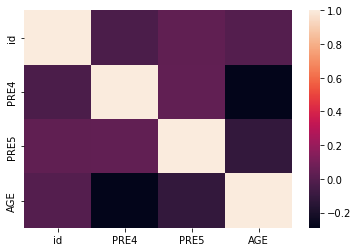

In [8]:
sns.heatmap(dataset.corr())

In [9]:
dataset[['PRE7', 'PRE8', 'PRE9', 'PRE10', 'PRE11', 'PRE17', 'PRE19', 'PRE25', 
     'PRE30', 'PRE32']] = dataset[['PRE7', 'PRE8', 'PRE9', 'PRE10', 'PRE11', 
                            'PRE17', 'PRE19', 'PRE25', 'PRE30', 'PRE32']].apply(lambda x: np.where(x == 'T', 1, 0)) 

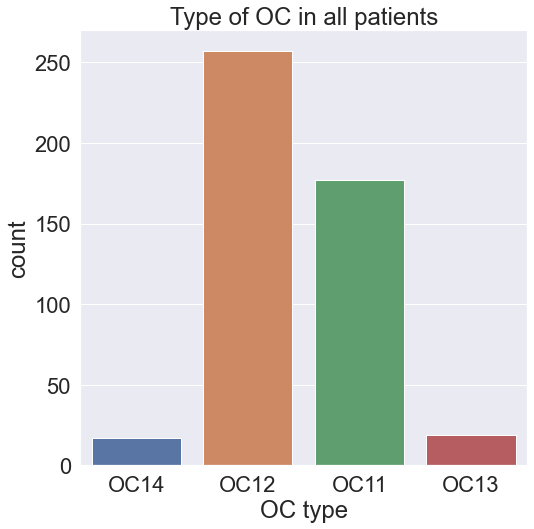

In [14]:
# this plot shows count of a given OC in all patients
sns.set_style(style="darkgrid")
fig, ax = plt.subplots(figsize=(8,8))
ax.set_title("Type of OC in all patients")

sns.set(font_scale=2)
sns.countplot(x= 'PRE14', data = dataset)
ax.set_xlabel('OC type')
plt.show()

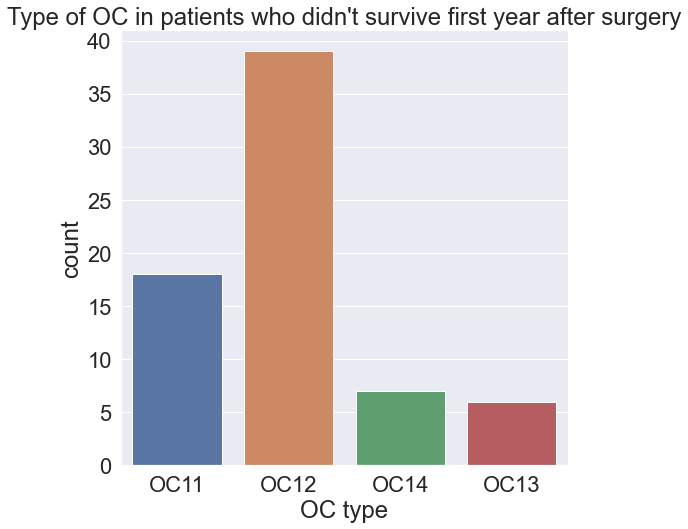

In [15]:
sns.set_style(style="darkgrid")
fig, ax = plt.subplots(figsize=(8,8))
sns.set(font_scale=2)
ax.set_title("Type of OC in patients who didn't survive first year after surgery")
sns.countplot(x= 'PRE14',  data =dataset[dataset['Risk1Yr'] == 'T'])
ax.set_xlabel('OC type')
plt.show()

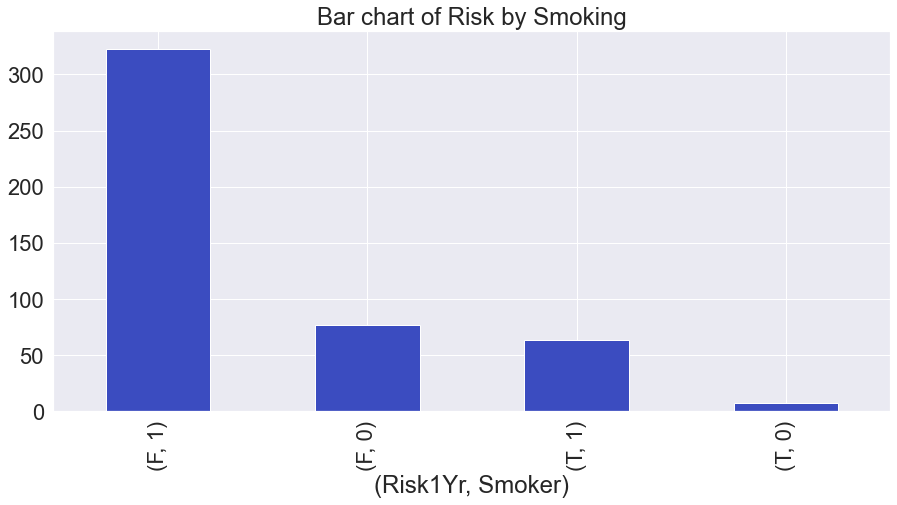

In [17]:
fig, ax = plt.subplots(figsize=(15,7))

dataset.groupby('Risk1Yr')['PRE30'].value_counts().plot(ax=ax, kind='bar', 
                                                    title = 'Bar chart of Risk by Smoking', colormap = 'coolwarm')
ax.set(xlabel = "(Risk1Yr, Smoker)")

plt.show()

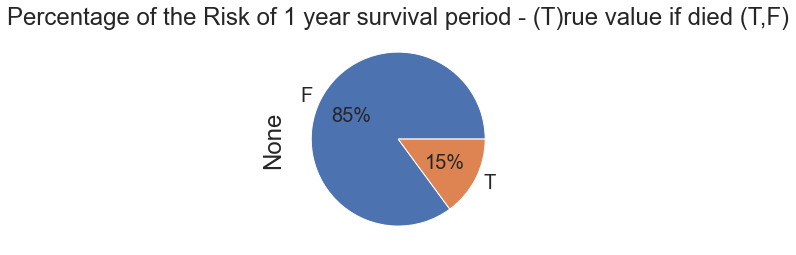

In [18]:
dataset.groupby('Risk1Yr').size().plot(kind='pie',  textprops={'fontsize': 20},autopct='%1.0f%%')
plt.title('Percentage of the Risk of 1 year survival period - (T)rue value if died (T,F)')
plt.show()

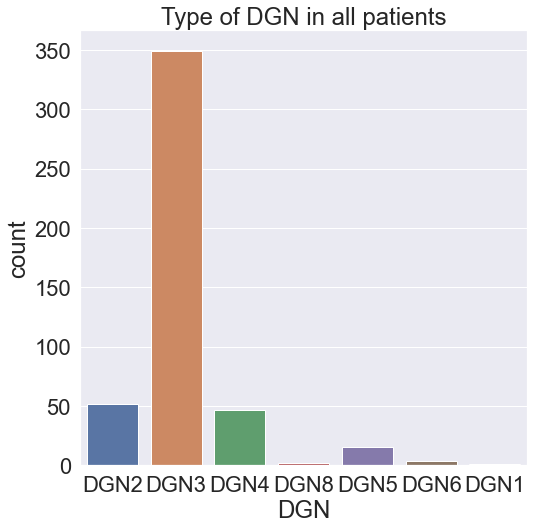

In [20]:
sns.set_style(style="darkgrid")
fig, ax = plt.subplots(figsize=(8,8))
ax.set_title("Type of DGN in all patients")

sns.set(font_scale=2)
sns.countplot(x='DGN', data=dataset)
plt.show()

In [21]:
dataset=dataset.drop('id',axis=1)
dataset.DGN=dataset.DGN.replace({"DGN3":3,"DGN2":2,"DGN4":4,"DGN5":5,"DGN6":0,"DGN8":8,"DGN1":1})
dataset.PRE6=dataset.PRE6.replace({"PRZ1":1,"PRZ0":0,"PRZ2":2})
dataset.PRE14=dataset.PRE14.replace({"OC12":2,"OC11":1,"OC13":3,"OC14":4})
dataset.head()

,DGN,PRE4,PRE5,PRE6,PRE7,PRE8,PRE9,PRE10,PRE11,PRE14,PRE17,PRE19,PRE25,PRE30,PRE32,AGE,Risk1Yr
0,2,2.88,2.16,1,0,0,0,1,1,4,0,0,0,1,0,60,F
1,3,3.40,1.88,0,0,0,0,0,0,2,0,0,0,1,0,51,F
2,3,2.76,2.08,1,0,0,0,1,0,1,0,0,0,1,0,59,F
3,3,3.68,3.04,0,0,0,0,0,0,1,0,0,0,0,0,54,F
4,3,2.44,0.96,2,0,1,0,1,1,1,0,0,0,1,0,73,T


In [22]:
x=dataset.drop('Risk1Yr',axis=1)

In [23]:
y=dataset.Risk1Yr

In [24]:
#Import the train_test_split from the sklearn
from sklearn.model_selection import train_test_split

In [25]:
#Split the Training Dataset and Test Dataset
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [27]:
#Import the RandomForestClassifier from the sklearn
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

In [28]:
y_predict=model.predict(X_test)
y_predict

array(['F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F',
       'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F',
       'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F',
       'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F',
       'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F',
       'F', 'T', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F',
       'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F',
       'F', 'F', 'F'], dtype=object)

In [29]:
#Import the accuracy_score from the sklearn
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predict)*100

87.2340425531915

In [30]:
from sklearn.metrics import confusion_matrix
performance=confusion_matrix(y_test,y_predict)
performance

array([[82,  1],
       [11,  0]], dtype=int64)

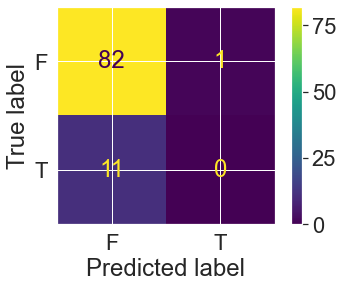

In [31]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model,X_test,y_test)
plt.show()